# Intro to Artificial Neural Networks with Keras

ANNs are the core of **Deep Learning**

### Why this wave of interest in ANN's is unlike to die out like died the 1960s and 1980s
* ANN's frequently outperform other ML techniques on very large and complex problems;
* The increase in computer power since 1990s and cloud platforms have made training large neural networks accessible;
* The training algorithms have been improved since 1990s;
* ANNs seem to have entered a virtuous circle of funding and progress, as new products based on ANNs are launched more attention towards them are pulled.

## Logical Computations with Neurons

A simple model of a artificial neuron has on or more binary inputs and one binary output. The AN activates its output when more than a certain number of its inputs are active.

*Assumption: a neuron is activated when at least two inputs are active*

### Identity function
$C = A$

$A \Rightarrow C$

*if* A is activated *then* C is activated as well (since it receives two inputs signal)

### AND
$C = A \land B$

$A \rightarrow C \leftarrow B$

Neuron C is activated *if and only if* both A *and* B are activated.

### OR
$C = A \lor B$

$A \Rightarrow C \Leftarrow B$

Neuron C gets activated *if at least* neuron A *or* B is activated.

### When a input connection can inhibit the neuron's activity
$C = A \land \neg B$

$A \Rightarrow C \leftarrow \neg B$

Neuron C is activated *only if* A is activated *and* B is deactivated.

## The Perceptron
One of the simplest ANN architectures and it is based on a slightly different artificial neuron called *threshold logic unit* (TLU) or *linear threshold unit* (LTU). The inputs and outputs are numbers (instead of binary) and each input is associated with a weight. The TLU computes a weighted sum of its inputs
$$z = w_1x_1+w_2x_2+\cdots+w_nx_n = \mathbf{X}^{\top}\mathbf{W}$$
then applies a step function to that sum and outputs the result
$$h_{\mathbf{W}}(\mathbf{X}) = step(z)$$

Most common step function used in Perceptrons

$$ Heaviside (z) =
  \begin{cases}
    0       & \quad \text{if } z < t\\
    1  & \quad \text{if } z \geq t
  \end{cases}
$$


$$
sgn(z)=
\begin{cases}
-1 & \quad \text{if} z < t\\
0 & \quad \text{if} z = t\\
+1 &\quad \text{if} z> t
\end{cases}
$$


$$
\text{t: threshold}
$$

A single TLU would be used for simple linear classification like Logistic Regression or SVM classifier. Training a TLU in this case means finding the right values for $\mathbf{W}$

### Composition

A **Perceptron** is composed of a single layer of TLUs with each TLU connected to all inputs (when all neurons in a layer are connected to every single in the previous layer, the layer is called a *fully connected layer* or *dense layer*)

The inputs of the Perceptron are fed to special passthrough neurons called input neurons: they output whatever input they are fed. In addition, an extra bias feature is generelly added ($x_0=1$), it's represented using a neuron called *bias neuron*, which outputs 1 all the time.

$$h_{\mathbf{W, b}}=\phi(\mathbf{XW}+b)$$
Where:  
$\mathbf{X}$: matrix($m\times n$) of input features.  
$\mathbf{W}$: matrix($n\times j$) of connection weights one column ($j$) per artificial neuron in the layer.  
$\mathbf{b}$: bias terms vector ($j$) contains all the connection weights between the bias neuron and the artificial neurons. It has one bias term per artificial neuron.$

The function $\phi$ is called activation function

### How is a Perceptron trained?
Hebb's rule: The connection weight between two neurons tends to increase when they fire simultaneously

A variant of the rule takes into account the error made by the network when making a prediction. **The Perceptron learning rule reinforces connections that help reduce the error**.

$$W_{i, j}^{\text{next step}}=W_{i, j}+\eta(y_j-\hat{y}_j)x_i$$

Where:  
$w_{i, j}$ is the connection weight between the $i^{th}$ input neuron and the $j^{th}$ output neuron. 
$x_i$ is the $i^{th}$ input value of the current training instance.  
$\hat{y}_j$ is the output of the $j^{th}$ output neuron for the current training instance.  
$y_j$ is the target output of the $j^{th}$ output neuron for the current training instance.  
$\eta$ is the learning rate.  

The decision boundary of each output neuron is linear, so Perceptron are incapable of learning complex patterns. However, if the training instances are linearly separables the algorithm would converge to a solution (*Perceptron convergence theorem*)


In [1]:
# Imports
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import numpy as np
import os

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [3]:
iris = load_iris()
X = iris.data[:, (2, 3)] # petal length and petal width
y = (iris.target == 0).astype('int')

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

`Perceptron` in scikit-learn is equivalent to using an `SGDClassifier` with the fallowing hyperparameters:  
`loss='perceptron'`  
`learning_rate='constant'`  
`eta0='1'`  
`penalty=None`  

*Contrary to Logistic Regression classifier, Perceptrons do not output a class probability, rather they make predictions based on hard threshold. This is one reason to **prefer** Logistic Regression over Perceptrons*

**Perceptron are incabable of solving some trivial problems like *Exclusive OR (XOR)* classification problem. However some of the limitations of perceptrons can be solved by stacking multiple Perceptrons (called Multilayer Perceptron (MLP)).

## The Multilayer Perceptron and Backpropagation
An MLP is composed of one input layer, one or more layers of TLUs (hidden layers) plus a final TLUs' layer called the output layer.

The layers close the input are called *lower layers* and those close to the output *upper layers*. Every layer except the output one includes a bias neuron and is fully connected to the next layer.

**Note**: The signal flows only in one direction (from the inputs to outputs), this architecture is an example of *feedforward neural network (FNN)*.

**The backpropagation** training algorithm in short is a Gradient Descent using an efficient technique for computing the gradients automatically. In just two pass through the (one forward and one backward), the backpropagation algorithm is able to compute the gradient of the network's error with regard to every single model parameter. In other words, it can find out how each connection weight and each bias term should be tweaked in order to reduce the error. Once it has there gradients it just performs a regular gradient descent step, and the whole process is repeated until the network converge to the solution.

**Note**: Automatically computing gradients is called *automatic differentiation*, or *autodiff*. There are various techniques. the one used by backpropagation is called *reverse-mode autodiff*

### The algorithm
* handles one mini-batch at a time. It goes through the training set multiple times (**Epochs**).
* The weights must be randomly initiated.
* The algorithm computes the output of all neurons in each layer until the last layer (**forward pass**) and all intermediates results are preserved.
* The algorithm computes the network's output error (using a loss function).
* Compute how much each output connection contributed to the error (chain rule) and how much of these error contributions come from each connection in the layer below and so on until reaches the input layer. This measures the error gradient across all connection weights in the network by propagating the error backward (**backward pass**).
* Finally the algorithm performs a Gradient Descent step to tweak all connection weights in the network using error gradient computed.

**Gradiant Descent needs a well-defined non-zero derivative function to make progress at every step. Initially  this function was the sigmoid function**
$$\sigma(z)=\frac{1}{1+e^{-z}}$$
**Other choices:**
$$tanh(z)=2\sigma(2z)-1$$
Unlike the sigmoid its output range from $-1$ to $1$ (instead of $0$ to $1$), and the range tends to make each layer's output centered around $0$ at the beginning of training speeding up convergence.
$$ReLU(z)=max(0,z)$$
Not differentiable at $z=0$ and the derivative is $0$ for $z<0$, but in practice it works well and is fast to compute (has become the default).

**A large enough DNN with nonlinear activations can theoretically approximate any continuous function**

## Regression MLPs

When building an MLP for regression, one don't want use any activation function for the output neurons and they can output any value. To Guarantee positive outputs use *ReLU* activation function or *softplus* ($log(1+exp(z))$). 

**TIP:** The Huber loss is quadratic when the error is smaller than a threshold $\delta$ (tipically 1) but linear when larger than $\delta$. 

### Typical regression MLP architecture

|**Hyperparameter**|**Typical value**|
|-|-|
|input neurons|One per feature|
|hidden layers| Typically 1 to 5|
|neurons per hidden layer|Typically 10 to 100|
|output neurons|1 per prediction dimension|
|Hidden activation|ReLU or SELU|
|Output Activation|None, Or ReLU/softplus(if positive) or logistic/tanh (if bounded)|
|loss function| MSE or MAE/Huber|

## Classification MLPs
* For binary classification problem: Single output neuron using the logistic activation function: the output will be a number between 0 and 1 (probability estimation of the positive class).  
* For multilabel binary classification: One neuron per positive class.  
* For multiclass classification: One neuron per class and a softmax activation function.

Regarding the loss function, cross-entropy (log loss) is usually good. as the objective is to predict probability distributions.

### Typical classification MLP architecture

|**Hyperparameter**|**Binary**|**Multilabel Binary**|**Multiclass**|
|-|-|-|-|
|input neurons and hidden layers|Same as regression|Same as regression|Same as regression|
|output neurons|1|1 per label|1 per class|
|Output Activation|logistic|logistic|softmax|
|loss function|Cross entropy|Cross entropy|Cross entropy|

## Implementing MLPs with Keras

Docs: [Keras](https://keras.io/)



In [3]:
import tensorflow as tf
from tensorflow import keras

2021-11-02 07:56:42.840463: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-02 07:56:42.840493: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
tf.__version__

'2.6.0'

In [5]:
keras.__version__

'2.6.0'

### Building an Image Classifier Using the sequencial API


In [6]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [11]:
X_train_full.shape

(60000, 28, 28)

In [12]:
X_train_full.dtype

dtype('uint8')

In [13]:
# Create validation set and scaling the input features

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

# Class names
class_names = ['T-shirt/top', 'Trouser', 'pullover', 'dress',
              'coat', 'sandall', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [11]:
class_names[y_train[0]]

'coat'

In [12]:
# Create the model
model = keras.models.Sequential()    # Simplest keras model for neural nets.
                                     # Composed of a single stack of layers connected sequentially.
model.add(keras.layers.Flatten(input_shape=[28, 28]))    # First layer. `flatten` to convert each
                                                         # image into 1D array. Compute X.reshape(-1, 28*28)
model.add(keras.layers.Dense(300, activation='relu'))    # `Dense` hidden layer with 300 neurons with ReLU
                                                         # as activation function. Each one manages its own
                                                         # weight matrix and a vector of bias terms (one per neuron)
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))    # a `Dense` output layer with 10 neurons (one per class)
                                                           # using softmax activation because the classes are exclusive
    


2021-11-01 07:44:39.348539: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-01 07:44:39.348570: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-01 07:44:39.348584: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pop-os): /proc/driver/nvidia/version does not exist
2021-11-01 07:44:39.348997: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [14]:
# Can be set as follow as well
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


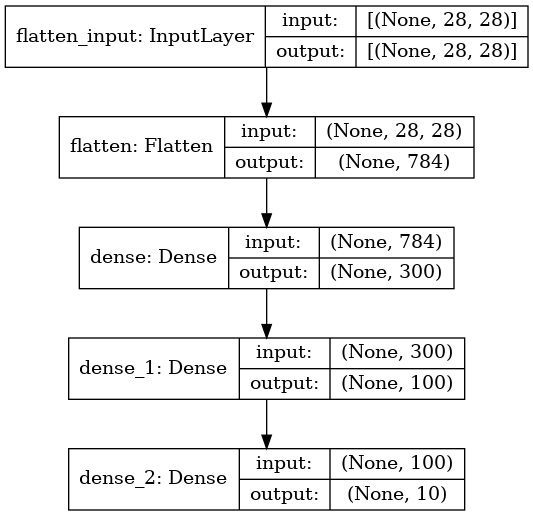

In [16]:
keras.utils.plot_model(model, show_shapes=True)

In [17]:
model.layers

In [18]:
model.layers[1].name

'dense'

In [19]:
model.get_layer('dense')

## Activation Functions
(ageron notebook)


In [20]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

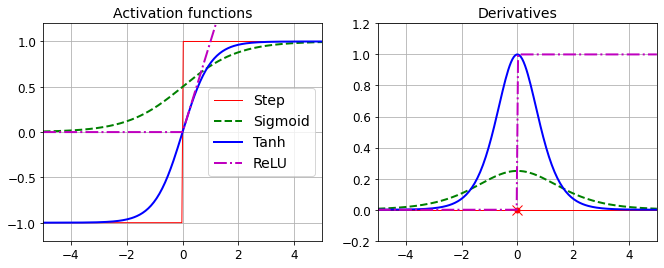

In [21]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])


plt.show()



In [22]:
# Paramets from a layer
# Weights
model.layers[1].get_weights()[0].shape

(784, 300)

In [23]:
# Biases
model.layers[1].get_weights()[1].shape

(300,)

### Compiling the model
Call the `compile()` to specify the loss function and the optimizer to use.

In [24]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.SGD(learning_rate=0.01),
             metrics=['accuracy'])

**TIP** to convert sparse labels (class indices) to one-hot vector labels, use `keras.utils.to_categorical()` function. other way, `np.argmax()` function with `axis=1`

### Training and evaluating the model

In [25]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

2021-11-01 07:44:40.385895: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4842 - accuracy: 0.8317 - val_loss: 0.4351 - val_accuracy: 0.8530
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4392 - accuracy: 0.8455 - val_loss: 0.5328 - val_accuracy: 0.7988
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4125 - accuracy: 0.8565 - val_loss: 0.3917 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3939 - accuracy: 0.8620 - val_loss: 0.3749 - val_accuracy: 0.8692
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3752 - accuracy: 0.8674 - val_loss: 0.3706 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3633 - accuracy: 0.8712 - val_loss: 0.3617 - val_accuracy:

**TIP** instead of using the argument `validation_data` one can use `validation_split` to the ratio of the training set.

`class_weight` argument handles unbalanced classes.

`sample_weight` argument is usefull when some instances are labeled by experts and others by other source. This can also be used inside `validation_data` as a third item in a tuple.

`fit()`returns a `History` object with the following attributes. 
`.params`, `.epoch`, `.history`

In [26]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [27]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

<AxesSubplot:>

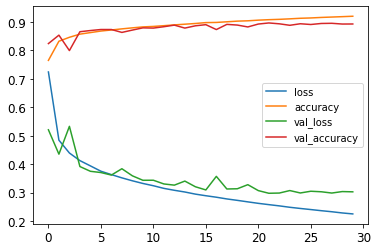

In [28]:
import pandas as pd
pd.DataFrame(data=history.history).plot()


An overfiting can be stated after the tenth epoch because the training loss is stedly decreasing but the validation loss is in the stedy state.

The first hyperparameter to check out is the learning rate. After trying another hyperparameter return the learning rate.).

If the performance is still poor, one can try to change the number of layers, neurons per layers and activation function used in each hidden layer.

Batch size can also be tuned in `fit(batch_size=32)`.

To evaluate the model `evaluate()` 

In [29]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3374 - accuracy: 0.8830


[0.3373766839504242, 0.8830000162124634]

### Making predictions


In [30]:
model.predict(X_test[:3]).round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

### Regression MLP with Sequential API

In [31]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
housing.data, housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(
X_train_full, y_train_full)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [32]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu',
                      input_shape=X_train.shape[1:]),    # input must be interable
    keras.layers.Dense(1)
])

In [33]:
model.compile(loss='mean_squared_error',
             optimizer=keras.optimizers.SGD(learning_rate=0.01))

history = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7987 - val_loss: 0.6806
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5335 - val_loss: 0.5710
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6129 - val_loss: 0.4964
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4694 - val_loss: 0.4785
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4462 - val_loss: 0.4615
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4350 - val_loss: 0.4553
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4263 - val_loss: 0.4433
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4182 - val_loss: 0.4446
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4116 - val_loss: 0.4326
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4080 - val_loss: 0.4306

<AxesSubplot:>

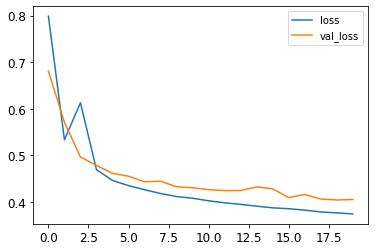

In [34]:
pd.DataFrame(data=history.history).plot()

In [35]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

162/162 [==============================] - 0s 743us/step - loss: 0.3829


## Functional API

### Wide & Deep Neural Net (Heng-Tze Cheng et al 2016)

It connects all or part of the inputs directly to the output layer. This architecture makes it possible for neural networks to learn both deep patterns and simple rules.

In [49]:
np.random.seed(42)
tf.random.set_seed(42)

In [50]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden_1 = keras.layers.Dense(30, activation='relu')(input_)
hidden_2 = keras.layers.Dense(30, activation='relu')(hidden_1)
concat = keras.layers.Concatenate()([input_, hidden_2])    # Layer with hidden and inputs
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [51]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 30)           270         input_4[0][0]                    
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 30)           930         dense_13[0][0]                   
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 38)           0           input_4[0][0]                    
                                                                 dense_14[0][0]             

In [52]:
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3035 - val_loss: 0.7101
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6619 - val_loss: 0.6456
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6156 - val_loss: 0.6133
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5873 - val_loss: 0.5928
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5664 - val_loss: 0.5708
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5470 - val_loss: 0.5567
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5324 - val_loss: 0.5430
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5193 - val_loss: 0.5318
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5088 - val_loss: 0.5219
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4994 - val_loss: 0.5134

One can also send some features directly through the wide path (overlapping allowed) and a diferent subset through the deep path.



In [55]:
input_a = keras.layers.Input(shape=[5],
                            name='wide')
input_b = keras.layers.Input(shape=[6],
                            name='deep')

hidden_1 = keras.layers.Dense(30, activation='relu')(input_b)
hidden_2 = keras.layers.Dense(30, activation='relu')(hidden_1)

concat = keras.layers.concatenate([input_a, hidden_2])
output = keras.layers.Dense(1,
                          name='output')(concat)
model = keras.Model(inputs=[input_a, input_b], outputs=[output])

In [56]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep (InputLayer)               [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 30)           210         deep[0][0]                       
__________________________________________________________________________________________________
wide (InputLayer)               [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 30)           930         dense_18[0][0]                   
____________________________________________________________________________________________

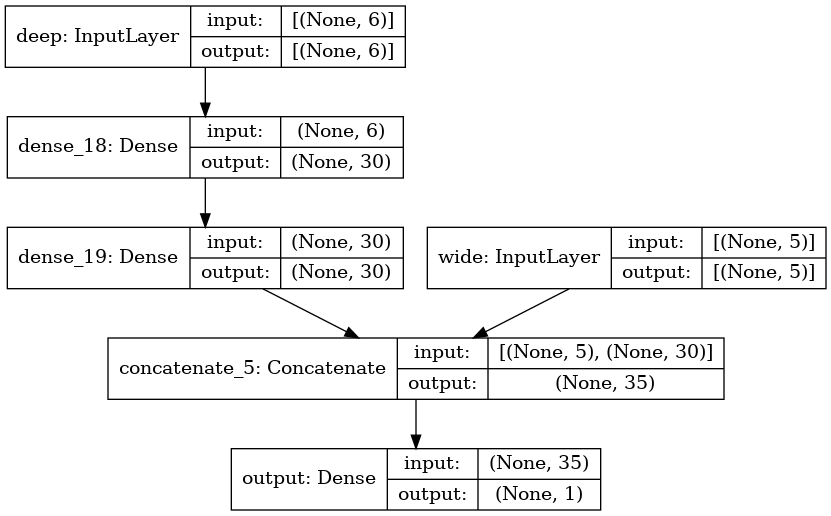

In [57]:
keras.utils.plot_model(model, show_shapes=True)

In [60]:
model.compile(loss='mse',
             optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [62]:
X_train_a, X_train_b = X_train[:, :5], X_train[:, 2:]
X_valid_a, X_valid_b = X_valid[:, :5], X_valid[:, 2:]
X_test_a, X_test_b = X_test[:, :5], X_test[:, 2:]

In [63]:
history = model.fit((X_train_a, X_train_b), y_train, epochs=20,
                   validation_data=((X_valid_a, X_valid_b), y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.0577 - val_loss: 0.9607
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8278 - val_loss: 0.7137
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6939 - val_loss: 0.6480
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6424 - val_loss: 0.6162
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6105 - val_loss: 0.5917
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5868 - val_loss: 0.5753
Epoch 7/20
363/363 [==============================] - 0s 823us/step - loss: 0.5683 - val_loss: 0.5612
Epoch 8/20
363/363 [==============================] - 0s 981us/step - loss: 0.5533 - val_loss: 0.5507
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5412 - val_loss: 0.5414
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5316 - val_loss: 0.

In [64]:
mse_test = model.evaluate((X_test_a, X_test_b), y_test)

X_new_A, X_new_B = X_test_a[:3], X_test_b[:3]
y_pred = model.predict((X_new_A, X_new_B))

162/162 [==============================] - 0s 984us/step - loss: 0.4903


### There are cases in which one may want multiple outputs

**Examples**
* Locate and classify the main object in a picture
* Multiple independent tasks but based on same data
* Regularization technique


In [65]:
np.random.seed(42)
tf.random.set_seed(42)

In [66]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [67]:
# each output needs its own loss function. We can also weighted the losses as we are
# interested more in the first one (the second is just regularization)
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [68]:
history = model.fit((X_train_a, X_train_b), [y_train, y_train],
                   epochs=20,
                   validation_data=((X_valid_a, X_valid_b), (y_valid, y_valid)))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.1377 - main_output_loss: 1.9300 - aux_output_loss: 4.0068 - val_loss: 1.0631 - val_main_output_loss: 0.8288 - val_aux_output_loss: 3.1725
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9125 - main_output_loss: 0.7249 - aux_output_loss: 2.6008 - val_loss: 0.8148 - val_main_output_loss: 0.6557 - val_aux_output_loss: 2.2465
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7656 - main_output_loss: 0.6357 - aux_output_loss: 1.9353 - val_loss: 0.7374 - val_main_output_loss: 0.6142 - val_aux_output_loss: 1.8463
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7043 - main_output_loss: 0.5994 - aux_output_loss: 1.6482 - val_loss: 0.6974 - val_main_output_loss: 0.5923 - val_aux_output_loss: 1.6432
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6687 - main_output_loss: 0.5769 - aux_output_loss: 1.4948 - val_loss

In [69]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_a, X_test_b],
                                                [y_test, y_test])

162/162 [==============================] - 0s 1ms/step - loss: 0.5287 - main_output_loss: 0.4825 - aux_output_loss: 0.9444


In [70]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_20 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 30)           930         dense_20[0][0]                   
____________________________________________________________________________________________

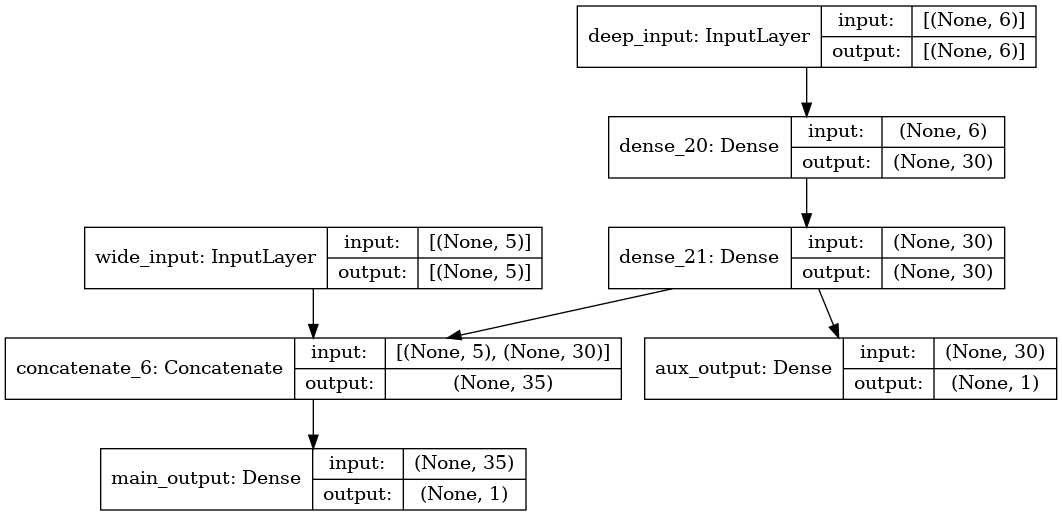

In [71]:
keras.utils.plot_model(model, show_shapes=True)

## Subclassing API to Build Dynamic Models

Until now we've been working on static models, which have a lot of pros, but some models involves loops, varying shapes, conditional branching and dynamic behaviors.

In [72]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_a, input_b = inputs
        hidden1 = self.hidden1(input_b)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_a, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    

In [74]:
model = WideAndDeepModel()

In [76]:
model.compile(loss='mse', loss_weights=[0.9, 0.1],
             optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [81]:
model.fit([X_train_a, X_train_b], [y_train, y_train], epochs=20,
         validation_data=([X_valid_a, X_valid_b], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.2815 - output_1_loss: 2.1649 - output_2_loss: 3.3311 - val_loss: 1.1401 - val_output_1_loss: 1.0046 - val_output_2_loss: 2.3591
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9850 - output_1_loss: 0.8598 - output_2_loss: 2.1122 - val_loss: 0.8738 - val_output_1_loss: 0.7657 - val_output_2_loss: 1.8463
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8383 - output_1_loss: 0.7366 - output_2_loss: 1.7538 - val_loss: 0.7927 - val_output_1_loss: 0.6998 - val_output_2_loss: 1.6295
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7719 - output_1_loss: 0.6814 - output_2_loss: 1.5862 - val_loss: 0.7460 - val_output_1_loss: 0.6628 - val_output_2_loss: 1.4946
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7288 - output_1_loss: 0.6464 - output_2_loss: 1.4700 - val_loss: 0.7112 - val_output_1_loss: 0.6337 - val_ou

In [82]:
model.summary()

Model: "wide_and_deep_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             multiple                  210       
_________________________________________________________________
dense_27 (Dense)             multiple                  930       
_________________________________________________________________
dense_28 (Dense)             multiple                  36        
_________________________________________________________________
dense_29 (Dense)             multiple                  31        
Total params: 1,207
Trainable params: 1,207
Non-trainable params: 0
_________________________________________________________________


## Saving and Restoring a Model

### Functional API

`model.save('xxx.h5')`

Kera use the HDF5 format to save model's architecture, all model parameters and optimizer.

`keras.models.load_model('xxxx.h5')`

**This works only with Sequential and Functional, but noo with model subclass. It can be used `save_weights()` and `load_weights()` to save and load the model parameters**

### Using Callbacks

The `fit()` method has a `callbacks` argument that lets one specify a list of objects that Keras will call at the start and end of the training, start and end of each epoch or before and after processing each batch.

`ModelCheckpoint` callback saves checkpoints of the model at regular intervals during training, by default at the end of each epoch.

Using a validation set during training can be set `save_best_only=True`. This is a simple way to implement *early stopping*

**There are much more callbacks available in the package**

In [15]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [17]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [18]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

In [19]:
model.compile(loss='mse', 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [20]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_model.h5',
                                               save_best_only=True)

In [22]:
history = model.fit(X_train, y_train,
                   epochs=10,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4527 - val_loss: 0.4177
Epoch 2/10
363/363 [==============================] - 0s 937us/step - loss: 0.4426 - val_loss: 0.4139
Epoch 3/10
363/363 [==============================] - 0s 868us/step - loss: 0.4341 - val_loss: 0.4064
Epoch 4/10
363/363 [==============================] - 0s 976us/step - loss: 0.4268 - val_loss: 0.4054
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4209 - val_loss: 0.3944
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4154 - val_loss: 0.3992
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4108 - val_loss: 0.3923
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4069 - val_loss: 0.3835
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4032 - val_loss: 0.3893
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4000 - val_loss: 

In [24]:
model = keras.models.load_model("my_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 712us/step - loss: 23566.2383


In [26]:
# Another way to implement early stop
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3299 - val_loss: 0.3207
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3300 - val_loss: 0.3218
Epoch 3/100
363/363 [==============================] - 0s 924us/step - loss: 0.3295 - val_loss: 0.3172
Epoch 4/100
363/363 [==============================] - 0s 851us/step - loss: 0.3289 - val_loss: 0.3174
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3290 - val_loss: 0.3145
Epoch 6/100
363/363 [==============================] - 0s 869us/step - loss: 0.3284 - val_loss: 0.3166
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3283 - val_loss: 0.3162
Epoch 8/100
363/363 [==============================] - 0s 937us/step - loss: 0.3279 - val_loss: 0.3160
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3273 - val_loss: 0.3135
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3269 

In [29]:
# Custom callback to detect overfitting
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print(f"\nval/train:{logs['val_loss']/logs['loss']:.2f}")
        # Could be `on_train_begin()`, `on_train_end()`, `on_epoch_begin()`,
        # `on_epoch_end()`, `on_batch_begin()` and `on_batch_end()`

In [30]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=3,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

Epoch 1/3
363/363 [==============================] - 0s 1ms/step - loss: 0.3225 - val_loss: 0.3115

val/train:0.97
Epoch 2/3
363/363 [==============================] - 0s 1ms/step - loss: 0.3229 - val_loss: 0.3097

val/train:0.96
Epoch 3/3
363/363 [==============================] - 0s 1ms/step - loss: 0.3223 - val_loss: 0.3117

val/train:0.97


Callbacks can also be used during evaluation and predictions.